Round 1
gRNAs are units with can be wild type (0) or mutated (1). We define a probability that each gRNA will get mutated each generation. After one gRNA turns 1 it can no longer be mutated. We can play around with probability of mutation and # of gRNAs to see what the expected % mutation vs generation curve would look like.

Round 2
Next simple case: same as before but we add that each mutated gRNA will give rise to one 0 and one 1. Because only one strand is mutated, during cell division each mutated gRNA will give rise to one wild type and one mutated strand. Again we can play around with probability of mutation and # of gRNAs to see what the expected % mutation vs generation curve would look like.


Round 3-n
- give length to gRNAs
- define mutatable bases (e.g. make them Cs). make them all Cs or only 25%
- old Pmut = PCas9bound. new Pmut = PAIDmut once Cas9 bound.
- store gRNA coordinates. mutating actual DNA seq:
    - PAIDmut uniform or PAID depends on gRNA positions
    - give orientation to gRNAs (FWD or REV)
    - account for overlapping gRNAs. mutating one makes overlapping unmutable
    - add threshold of mutated bases for Cas9 binding






Cell Division?

Starting with DNA:
    - DNA seq: GFP
    - 

Make a function that has gennum,cell_num,binding prob, mutation prob,saving directory, gRNA file location, sequence, that does all this

Current Time = 10--25--42.634642_12-08-2023
['ggttacccggtactgcataacaatggaacccgaaccgtaactgggacagatcgaaaagctggcctggtttctcgctgtgtgtgccgtgttaatccgtttgccatcagcgagattattagtcaattgcagttgcagcgtttcgctttcgtcctcgtttcactttcgagttagactttattgcagcatcttgaacaatcgtcgcagtttggtaacacgctgtgccatactttcatttagacggaatcgagggaccctggactataat*gcacaacgagaccgggttgcgaagtcagggcattccgccgatctagccatcgccatcttctgc*ggcgttt*tttgtttgtttgctgggattagccaagggcttgacttggaatccaatcccgatccctagcccgatcccaatcccaatcccaatcccttgtccttttcattagaaagtcataaaaacacataataatgatgtcgaagggattagggg', 'ggttacccggtactgcataacaatggaacccgaaccgtaactgggacagatcgaaaagctggcctggtttctcgctgtgtgtgccgtgttaatccgtttgccatcagcgagattattagtcaattgcagttgcagcgtttcgctttcgtcctcgtttcactttcgagttagactttattgcagcatcttgaacaatcgtcgcagtttggtaacacgctgtgccatactttcatttagacggaatcgagggaccctggactataatcgcacaacgagac*gggttgcgaagtcagggcattccgccgatctagc*atcgccatcttctgcgggcgtttgtttgtttgtttgctgggattagccaagggcttgacttggaatccaatcccgatccctagcccgatcccaatcccaatcccaatcccttgtccttttcattagaaagtcataaaaacacataataatga

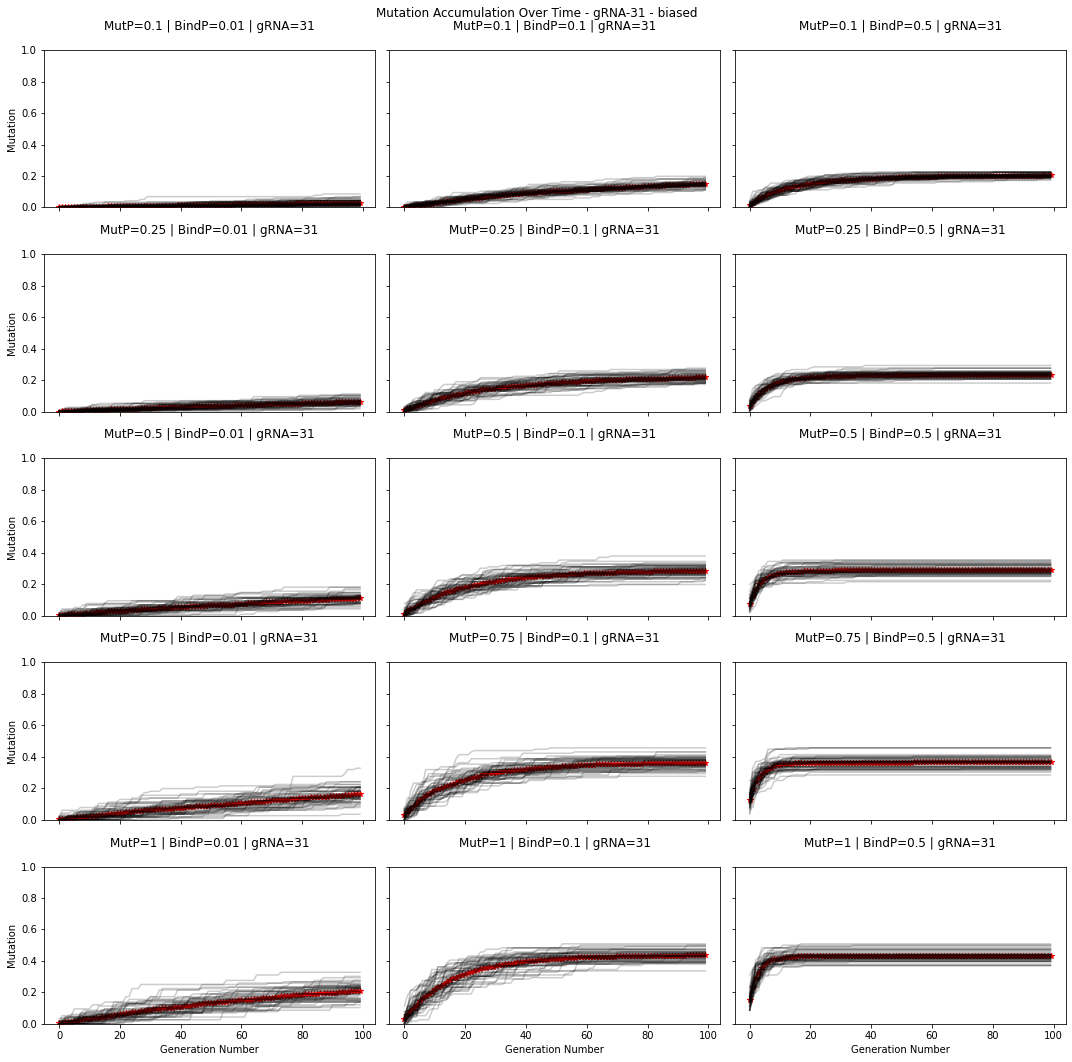

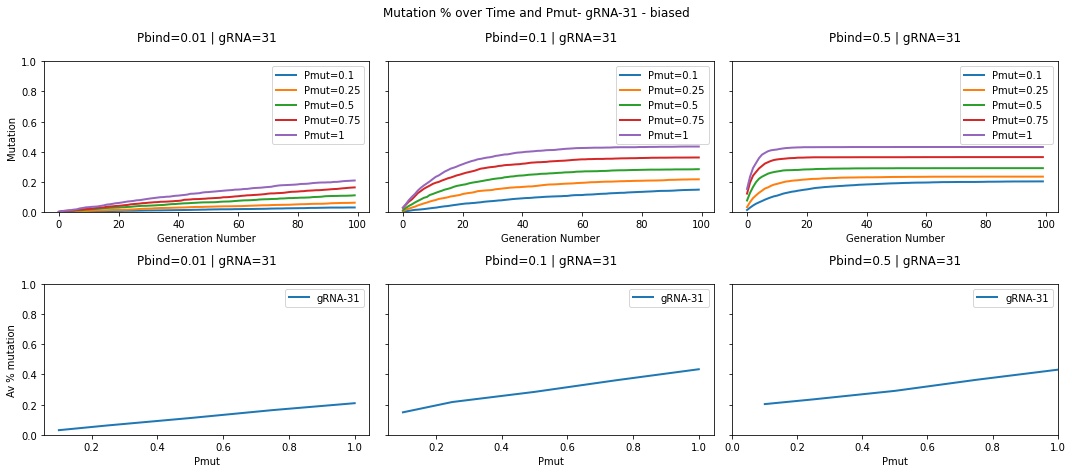

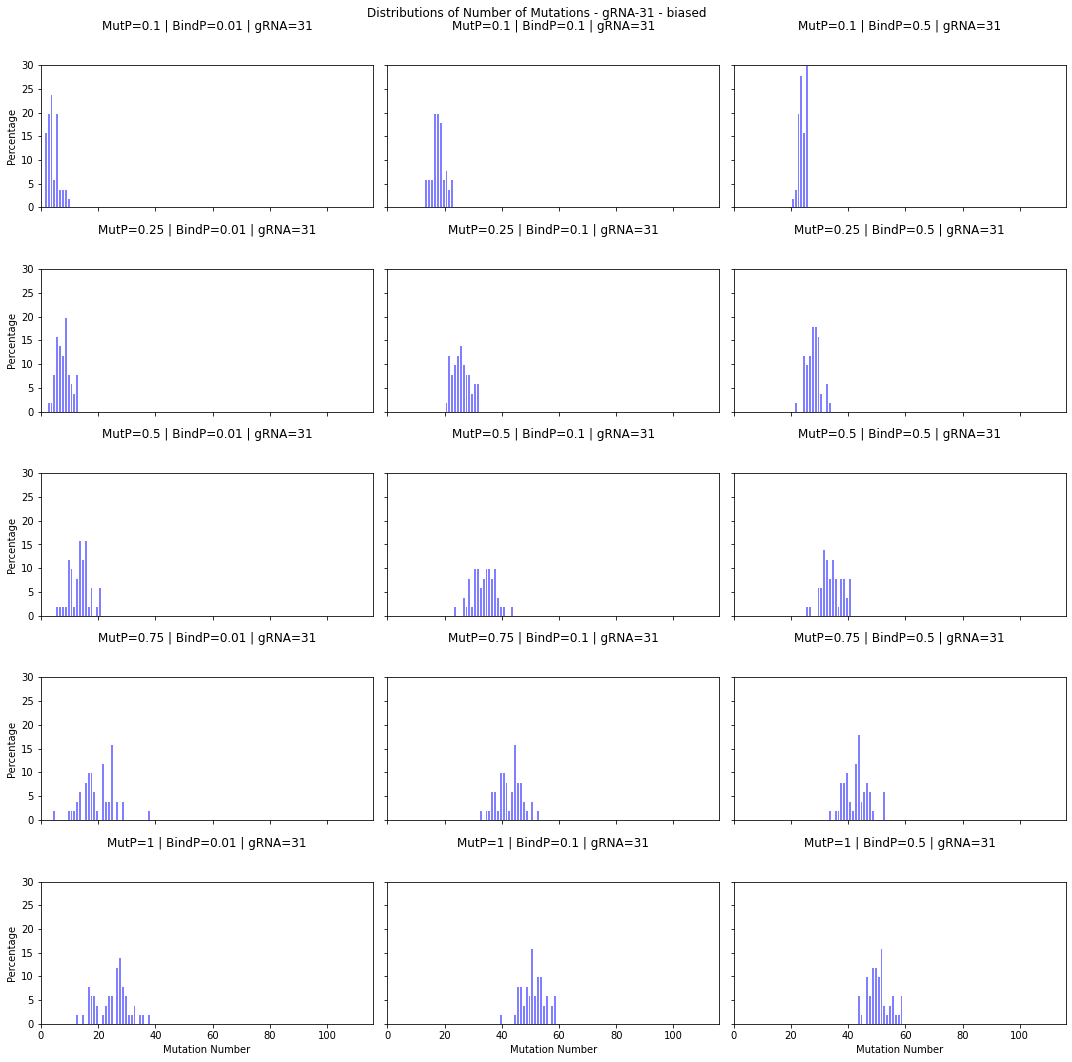

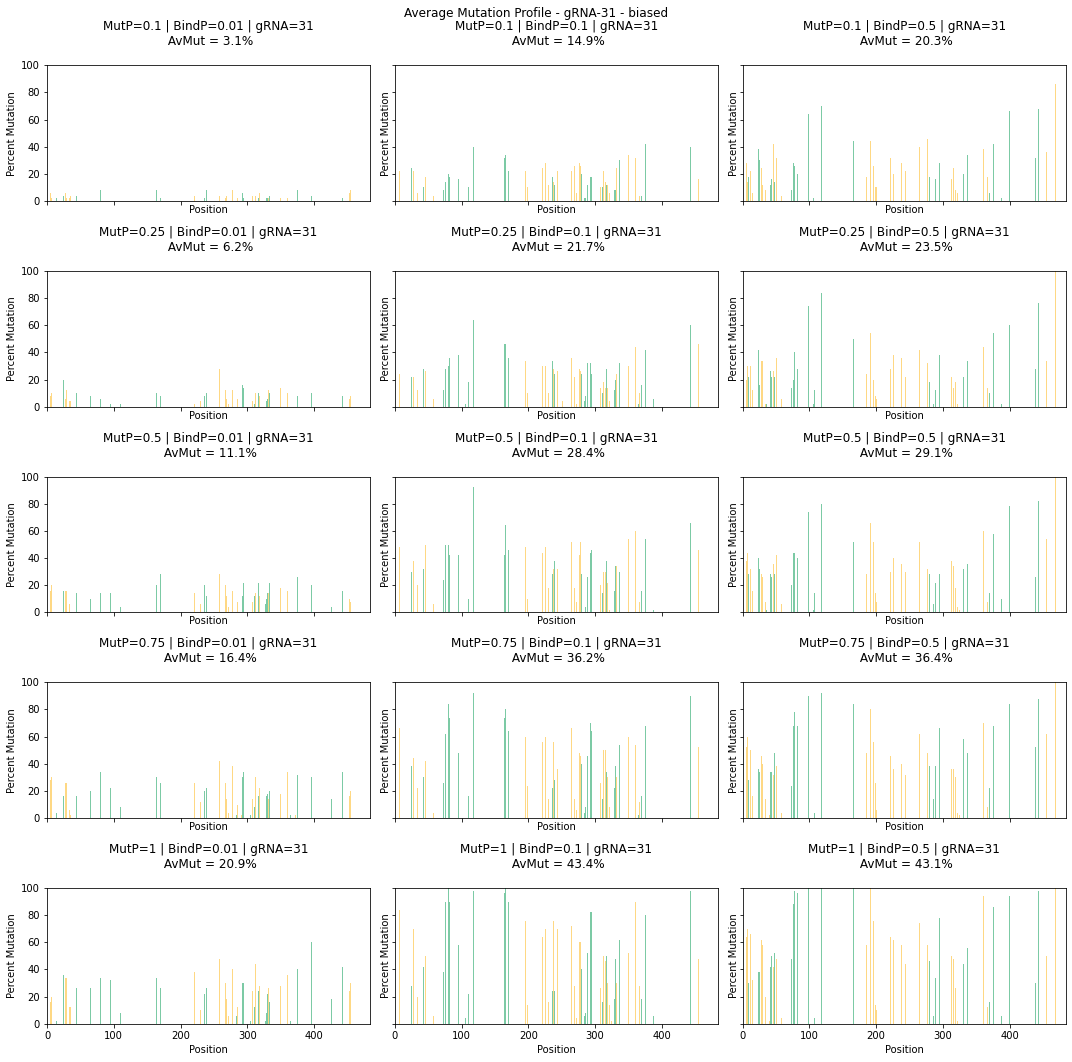

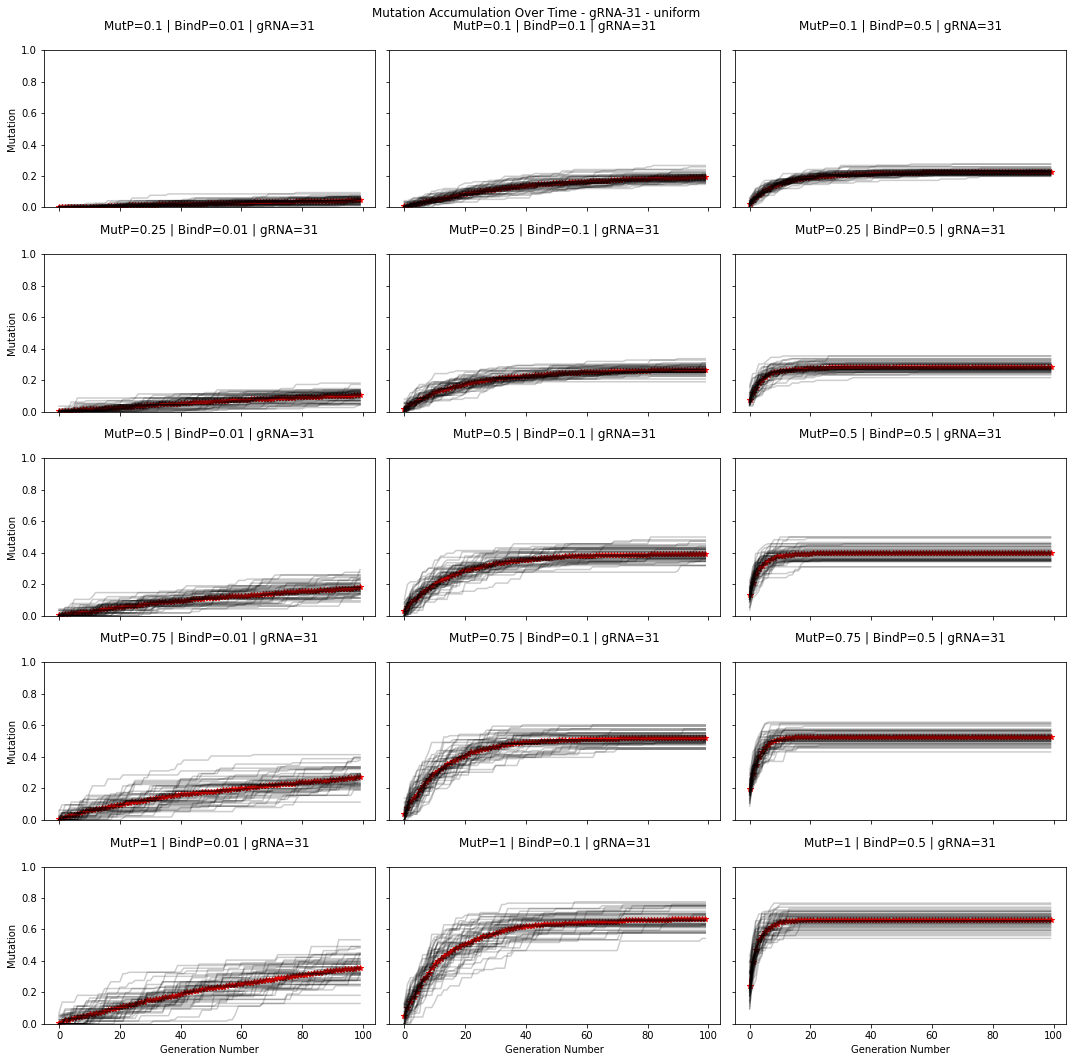

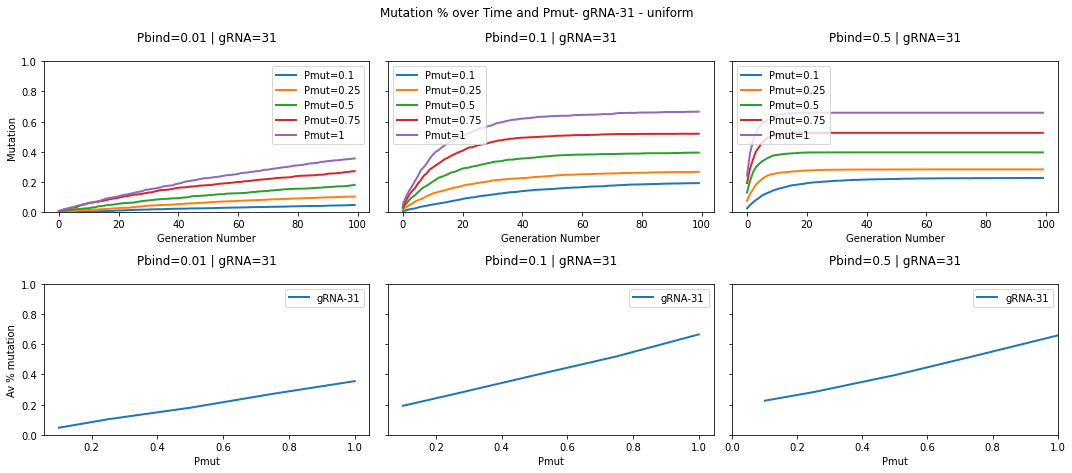

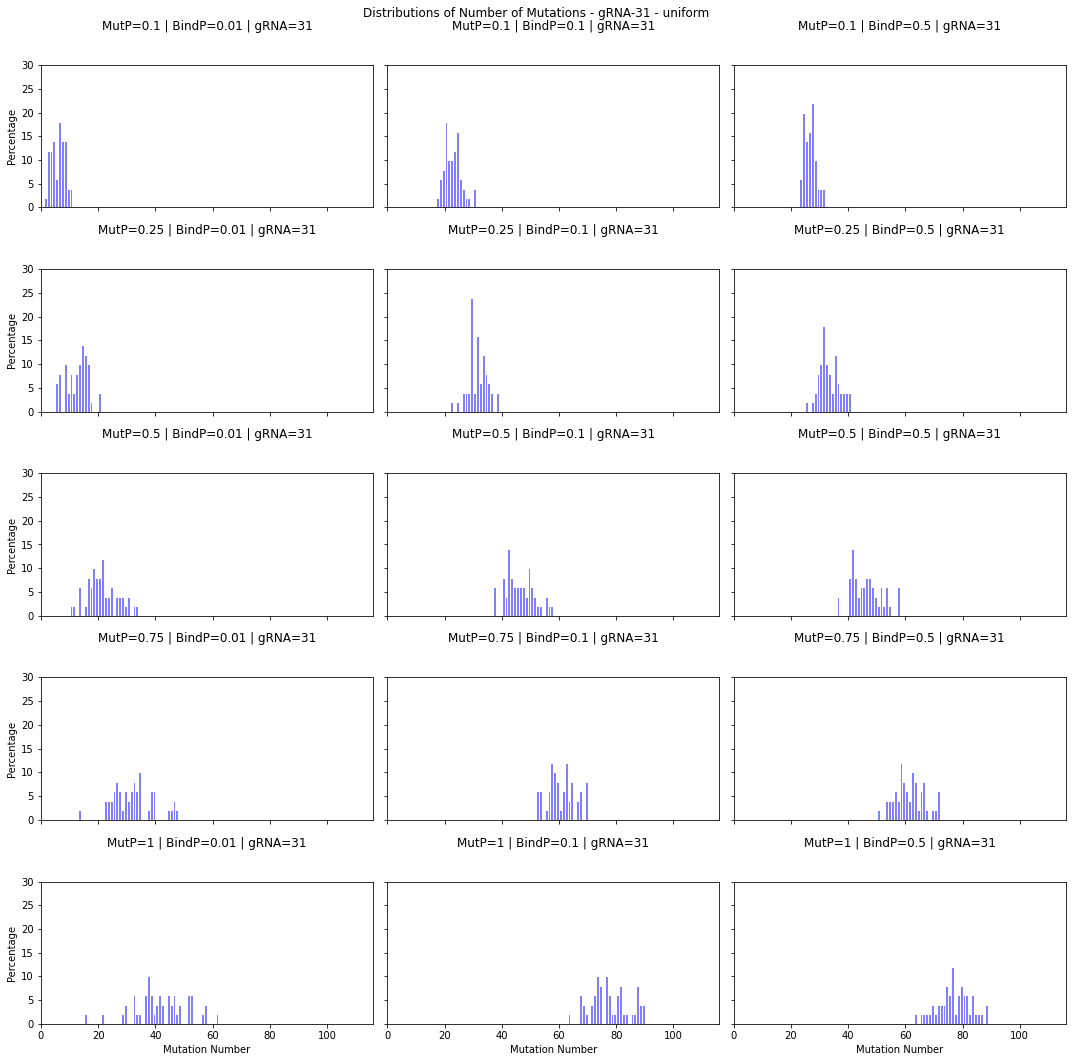

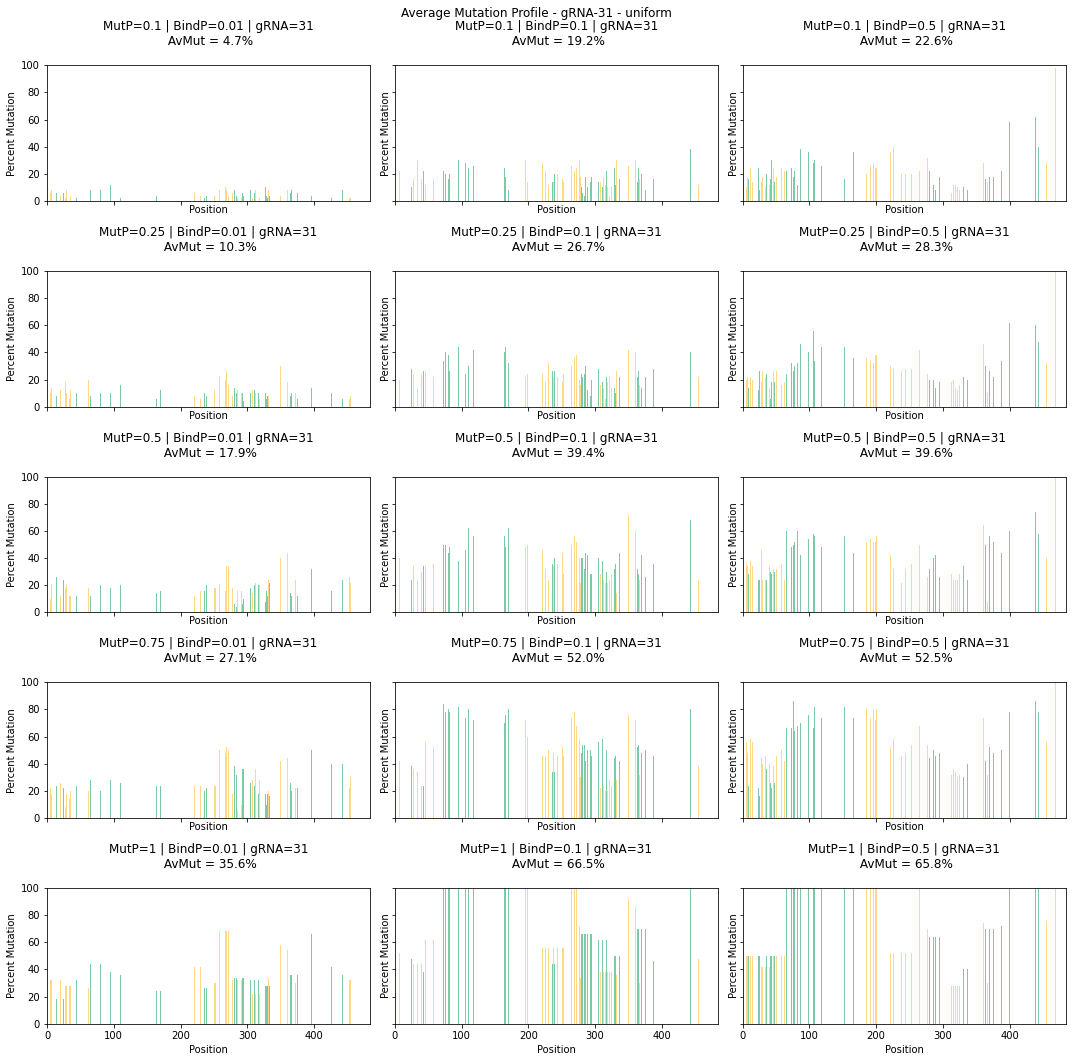

In [6]:
import importlib
import matplotlib.pylab as plt
import math
from matplotlib import pyplot
import matplotlib
import pandas as pd
import random
import numpy
import numpy as np
import numpy.matlib
from datetime import datetime
import seaborn
# import bokeh
import pylab
import matplotlib.ticker as mtick
from collections import Counter
from fractions import Fraction  
import decimal
from matplotlib.ticker import PercentFormatter
import os
import FunctionsJFS
importlib.reload(FunctionsJFS)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# import imagecodecs
#import codec.decode
#contents = input()
#contents = codec.decode(contents, "unicode_escape")


now = datetime.now()
current_time = now.strftime("%H--%M--%S.%f"+"_" + "%m-%d-%Y") #time format: Hour--Minute--Second and femtosecond_month-day-year
print("Current Time =", current_time)
#def mutate():
 #   c*
GFPseqF_original = "tgcttcagccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaggtgaagttcgagggcgacaccctggtgaaccgcatcgagctgaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaa"
         # tgcttcagccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaggtgaagttcgagggcgacaccctggtgaaccgcatcgagctgaagggcatcgacttcaaggaggacggcaacatcctggggca*aagctggagta*aacta*aacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaa
eve2 = 'ggttacccggtactgcataacaatggaacccgaaccgtaactgggacagatcgaaaagctggcctggtttctcgctgtgtgtgccgtgttaatccgtttgccatcagcgagattattagtcaattgcagttgcagcgtttcgctttcgtcctcgtttcactttcgagttagactttattgcagcatcttgaacaatcgtcgcagtttggtaacacgctgtgccatactttcatttagacggaatcgagggaccctggactataatcgcacaacgagaccgggttgcgaagtcagggcattccgccgatctagccatcgccatcttctgcgggcgtttgtttgtttgtttgctgggattagccaagggcttgacttggaatccaatcccgatccctagcccgatcccaatcccaatcccaatcccttgtccttttcattagaaagtcataaaaacacataataatgatgtcgaagggattagggg'


gennum=100 #default is 100
cell_num=50 #default is 50
fullpath='./'

Seq_original = GFPseqF_original[15:-75]
Shift = 15

gRNAFile= './gRNAs_non_overlapping.csv' #not overlapping
gRNAFileNickName = '4 gRNAs no overlap'

gRNAFile = './gRNAs_4.csv' # overlapping
gRNAFileNickName = '4 gRNAs 25% overlap'

gRNAFile = './gRNAs-4-50overlap.csv' # overlapping
gRNAFileNickName = '4 gRNAs 50% overlap'

gRNAFile = './gRNAs-4-100overlap.csv' # overlapping
gRNAFileNickName = '4 gRNAs 100% overlap'

gRNAFile = './gRNAs_24.csv'
gRNAFileNickName = '24 gRNAs'

Seq_original = eve2
Shift = 0
gRNAFile = './gRNAs-eve_31.csv'
gRNAFileNickName = 'gRNA-31'

ProbBindlist=[0.01,0.1,0.5]
ProbMutlist=[0.1,0.25,0.5,0.75,1]

for Uniform in [0,1]:
    #Uniform = 0
    if Uniform == 1:
        Uniformity = [1]
    else:
        Uniformity = [0.60,0.78,0.9, 0.95,0.98,1,1, 0.98,0.95, 0.9, 0.78,0.60,0.40,0.22,0.12,0.07,0.04,0.02,0.01,0.00]

    if Uniform:
        Unif = 'uniform'
    else:
        Unif = 'biased'


    figsize1= 15#default 15
    figsize2= 15#default 10


    #before log alteration#cfig,ax = plt.subplots(len(ProbBindlist),len(ProbMutlist),figsize=(figsize1, figsize2),sharex=True, sharey=True)
    cfig,ax = plt.subplots(len(ProbMutlist),len(ProbBindlist),figsize=(figsize1, figsize2),sharex=True, sharey=True)
    cfig2,ax2 = plt.subplots(2,len(ProbBindlist),figsize=(figsize1, figsize2/2.25),sharex=False, sharey=True)

    figurehistogram,axhist=plt.subplots(len(ProbMutlist),len(ProbBindlist),figsize=(figsize1, figsize2),sharex=True, sharey=True)
    figureplot,axplot=plt.subplots(len(ProbMutlist),len(ProbBindlist),figsize=(figsize1, figsize2),sharex=True, sharey=True)
    cfig.suptitle('Mutation Accumulation Over Time - '+gRNAFileNickName + ' - '+Unif)
    cfig2.suptitle('Mutation % over Time and Pmut- '+gRNAFileNickName + ' - '+Unif)
    figureplot.suptitle('Average Mutation Profile - '+gRNAFileNickName + ' - '+Unif)
    figurehistogram.suptitle('Distributions of Number of Mutations - '+gRNAFileNickName + ' - '+Unif)
    #Call plot function ^
    #PlotIndex=0 


    loop2=0
    while loop2<len(ProbBindlist): 
        dfAvMut = pd.DataFrame(columns=['x',gRNAFileNickName])
        loop=0
        while loop<len(ProbMutlist): 
            ProbBind= ProbBindlist[loop2]
            ProbMut= ProbMutlist[loop]
            #ProbBind = 0.5 #default is 0.1
            #ProbMut = 1.0 #default .5
            #Call simulation function
            [Mutation_matrix,mutation_limit,gRNAsDF,gfplist]=FunctionsJFS.SimulationFunc(gennum,cell_num,ProbBind,ProbMut, gRNAFile, Seq_original, Uniformity, Shift)  
            print(gfplist)
            file = open(fullpath+gRNAFileNickName + '-' + Unif + str(cell_num) + 'Cells-' + str(gennum) + '_Pbind_'+str(ProbBind)+ '_Pmut_'+str(ProbMut)+'.txt','w')
            for item in gfplist:
                file.write(item+"\n")
            file.close()
            ax = ax.ravel()
            ax2 = ax2.ravel()
            axhist = axhist.ravel()
            axplot = axplot.ravel()
            [cfig,ax,cfig2,ax2,figurehistogram,axhist,figureplot,axplot,dfAvMut]=FunctionsJFS.PlotFunct(cell_num,fullpath,Mutation_matrix,mutation_limit,ProbMut,ProbBind,gRNAsDF,gennum,gfplist,Seq_original,cfig,ax,cfig2,ax2,figurehistogram,axhist,figureplot, axplot, loop,loop2,gRNAFile,dfAvMut)
            #PlotIndex=PlotIndex+1
            loop=loop+1
            print('simulation and plotting done for Pbind = '+str(ProbBind)+ ' Pmut = '+str(ProbMut))

        matplotlib.pyplot.figure(cfig2)
        dfAvMut.plot(x = 'x', y = gRNAFileNickName, linewidth=2.0, ylabel='Av % mutation', xlabel='Pmut',title=  'Pbind='+ str(ProbBind) + ' | ' + 'gRNA=' + str(len(gRNAsDF)), ax=ax2[loop2+len(ProbBindlist)])
        matplotlib.pyplot.ylim(0, 1)
        matplotlib.pyplot.xlim(0, 1)
        loop2=loop2+1
    #


    matplotlib.pyplot.figure(cfig)
    #matplotlib.pyplot.yscale('log')
    #matplotlib.pyplot.xscale('log')
    matplotlib.pyplot.savefig(fullpath+gRNAFileNickName + '-' + Unif + str(cell_num) + 'Cells-' + str(gennum) + 'Gen_MutTime.pdf')

    matplotlib.pyplot.figure(cfig2)
    matplotlib.pyplot.savefig(fullpath+gRNAFileNickName + '-' + Unif + str(cell_num) + 'Cells-' + str(gennum) + 'Gen_MutTime_combined.pdf')

    matplotlib.pyplot.figure(figurehistogram)
    matplotlib.pyplot.savefig(fullpath+gRNAFileNickName + '-' + Unif + str(cell_num) + 'Cells-' + str(gennum) + 'Gen_Hist.pdf')
        
    matplotlib.pyplot.figure(figureplot)
    matplotlib.pyplot.savefig(fullpath+gRNAFileNickName + '-' + Unif + str(cell_num) + 'Cells-' + str(gennum) + 'Gen_Dist.pdf')
        





<img src="julia/mutprob.png" width="" align="" />

In [ ]:
import math 
import numpy as np
import matplotlib.pylab as plt
sigma = 0.2
mu = 5
pi = 3.141592
def curve(x):
    y = 1/(sigma*math.sqrt(2*pi)) * math.exp(-(x-mu)**2/2*sigma**2)
    return(y)

X = range(0,20)
Y = [curve(x) for x in X] 
Y = np.array(Y)
Uniformity = Y/max(Y)
print(Uniformity)
Uniformity2 = [0.60,0.78,0.9, 0.95,0.98,1,1, 0.98,0.95, 0.9, 0.78,0.60,0.40,0.22,0.12,0.07,0.04,0.02,0.01,0.00]
plt.figure(figsize=(10,9))
plt.plot(Uniformity)
plt.plot(Uniformity2)
plt.show()

<img src="image-20230819-150938.png" width="" align="" />

<img src="image-20230816-225801.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2a5d679-314c-463f-8a2d-2111a41ff022' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>